In [32]:
import numpy as np
from qiskit import *
%matplotlib inline

# step 0

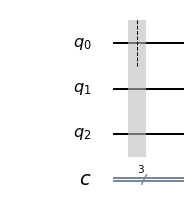

In [33]:
circ = QuantumCircuit(3,3)
circ.barrier(0)
circ.draw()

In [34]:
from qiskit import Aer
backend = Aer.get_backend('statevector_simulator')
job = execute(circ, backend)
result = job.result()
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


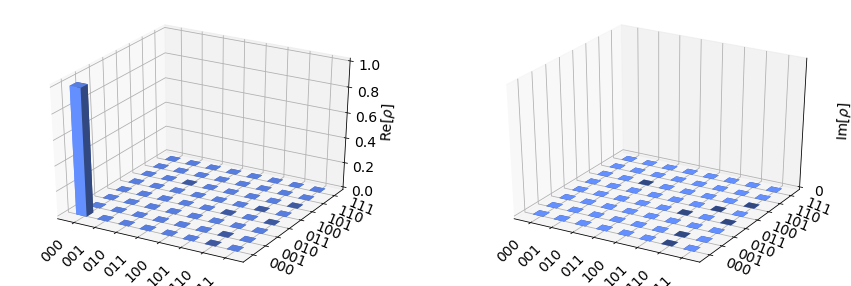

In [35]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

# step 1

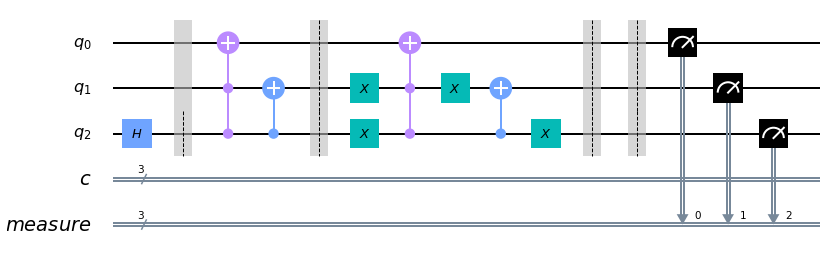

In [36]:
circ = QuantumCircuit(3,3)
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.measure_all()
circ.draw()

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


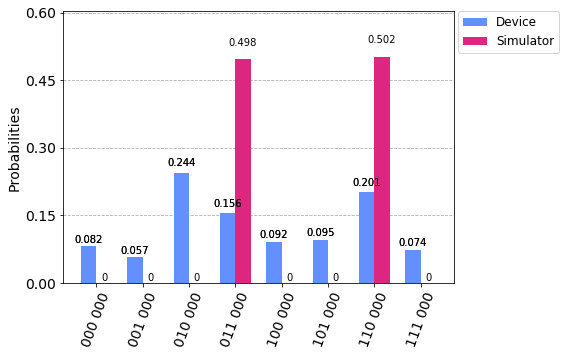

In [37]:
shots = 4096
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

# step 2

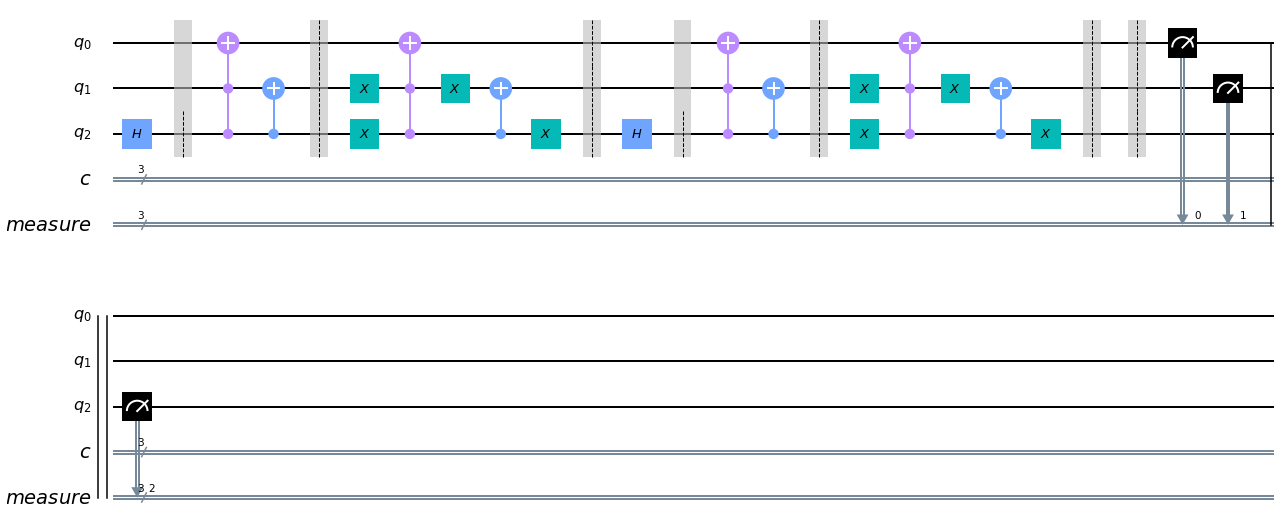

In [38]:
circ = QuantumCircuit(3,3)
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.measure_all()
circ.draw()

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


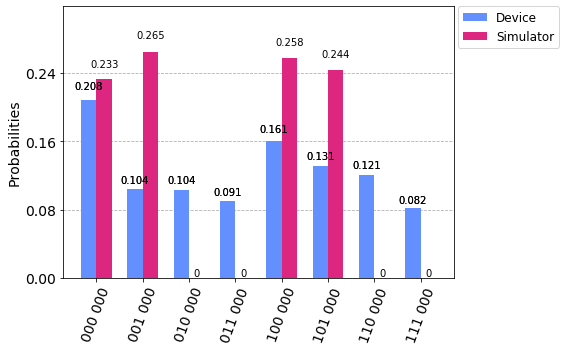

In [39]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])

# step 3

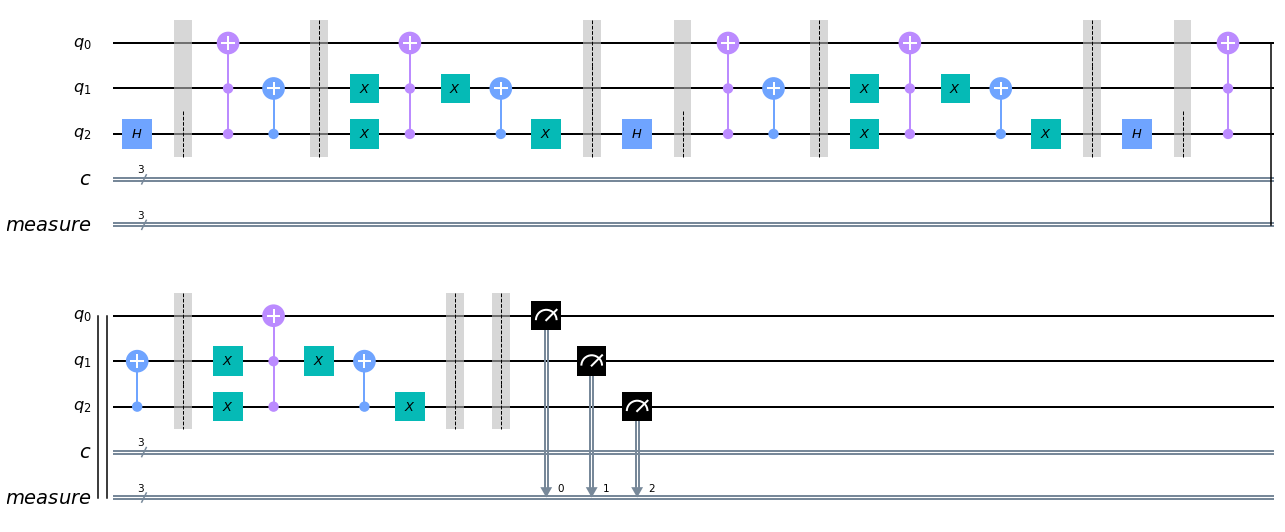

In [40]:
circ = QuantumCircuit(3,3)
circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()

circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()

circ.h(2)
circ.barrier(2)
circ.ccx(2,1,0)
circ.cx(2,1)
circ.barrier()
circ.x(1)
circ.x(2)
circ.ccx(2,1,0)
circ.x(1)
circ.cx(2,1)
circ.x(2)
circ.barrier()
circ.measure_all()
circ.draw()

Credentials are already in use. The existing account in the session will be replaced.


Job Status: job has successfully run


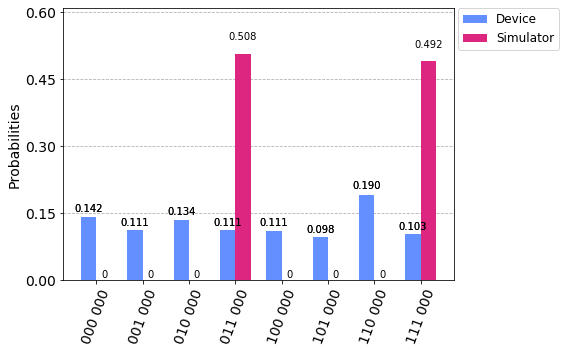

In [41]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(circ, backend_sim, shots=shots)
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)

from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(group='open')
# provider.backends()

backend = provider.get_backend('ibmq_london')

from qiskit.tools.monitor import job_monitor

job_exp = execute(circ, backend=backend, shots=shots)
job_monitor(job_exp)

result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ)
from qiskit.visualization import plot_histogram
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])